In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [105]:
df = pd.read_csv("/content/Dataset - Updated.csv")
df.head()

Age  Systolic BP  Diastolic   BS  Body Temp   BMI  Previous Complications  \
0   22         90.0       60.0  9.0        100  18.0                     1.0   
1   22        110.0       70.0  7.1         98  20.4                     0.0   
2   27        110.0       70.0  7.5         98  23.0                     1.0   
3   20        100.0       70.0  7.2         98  21.2                     0.0   
4   20         90.0       60.0  7.5         98  19.7                     0.0   

   Preexisting Diabetes  Gestational Diabetes  Mental Health  Heart Rate  \
0                   1.0                     0              1        80.0   
1                   0.0                     0              0        74.0   
2                   0.0                     0              0        72.0   
3                   0.0                     0              0        74.0   
4                   0.0                     0              0        74.0   

  Risk Level  
0       High  
1        Low  
2        Low  
3        Low  
4        Low

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


In [107]:
# Select only numerical columns for plotting
numerical_cols = df.select_dtypes(include=np.number).columns

# Create histograms for numerical features
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create pairplot for numerical features (can be slow with many columns)
if len(numerical_cols) < 10: # Avoid plotting too many columns
    sns.pairplot(df[numerical_cols])
    plt.show()
else:
    print("Skipping pairplot due to large number of numerical columns.")

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Skipping pairplot due to large number of numerical columns.


In [108]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isna().sum()

Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64

In [109]:
df.dtypes

Age                         int64
Systolic BP               float64
Diastolic                 float64
BS                        float64
Body Temp                   int64
BMI                       float64
Previous Complications    float64
Preexisting Diabetes      float64
Gestational Diabetes        int64
Mental Health               int64
Heart Rate                float64
Risk Level                 object
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1148 non-null   int64  
 1   Systolic BP             1148 non-null   float64
 2   Diastolic               1148 non-null   float64
 3   BS                      1148 non-null   float64
 4   Body Temp               1148 non-null   int64  
 5   BMI                     1148 non-null   float64
 6   Previous Complications  1148 non-null   float64
 7   Preexisting Diabetes    1148 non-null   float64
 8   Gestational Diabetes    1148 non-null   int64  
 9   Mental Health           1148 non-null   int64  
 10  Heart Rate              1148 non-null   float64
 11  Risk Level              1148 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 116.6+ KB


Mental Health
0    759
1    389
Name: count, dtype: int64


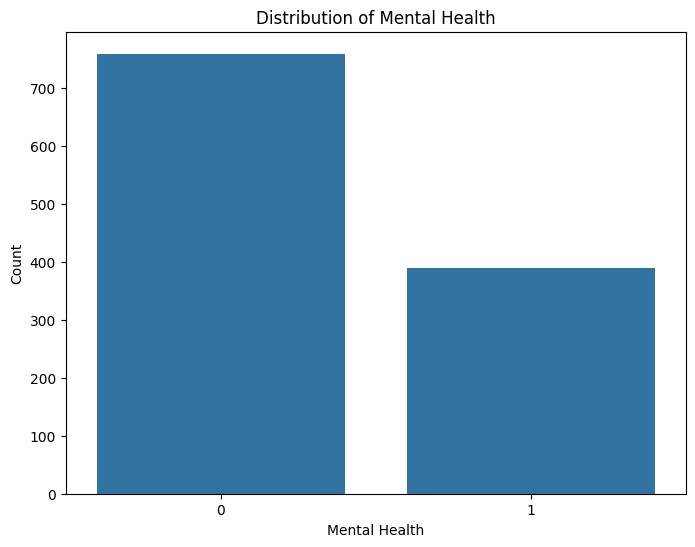

In [121]:
print(df['Mental Health'].value_counts())

# Plot the distribution of the 'Risk Level' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental Health', data=df)
plt.title('Distribution of Mental Health')
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.show()

In [114]:
# Encode target
le = LabelEncoder()
df['Risk Level'] = le.fit_transform(df['Risk Level'])

# Split features and target
X = df.drop('Risk Level', axis=1)
y = df['Risk Level']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



In [116]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 kelas: Low, Medium, High
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,947 (11.51 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8285 - loss: 0.5327 - val_accuracy: 0.9620 - val_loss: 0.1122
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9657 - loss: 0.1299 - val_accuracy: 0.9783 - val_loss: 0.0767
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9562 - loss: 0.1026 - val_accuracy: 0.9783 - val_loss: 0.0708
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.0938 - val_accuracy: 0.9783 - val_loss: 0.0695
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.1214 - val_accuracy: 0.9783 - val_loss: 0.0691
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9788 - loss: 0.0719 - val_accuracy: 0.9783 - val_loss: 0.0661
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0737 - val_accuracy: 0.9783 - val_loss: 0.0643
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.0716 - val_accuracy: 0.9783 - val_loss

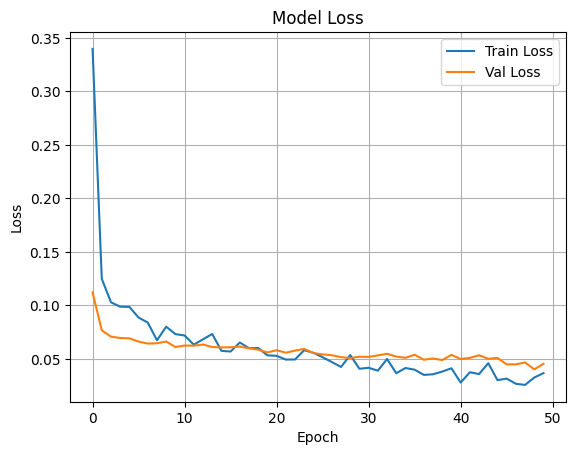

In [118]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [120]:
# Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Convert class labels back to strings using the fitted label encoder's classes
# This ensures we only use the labels the encoder was trained on.
target_names = le.classes_

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels, target_names=target_names))

# For the confusion matrix as well, use the correct target names
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        High       0.96      0.96      0.96        93
         Low       0.97      0.97      0.97       137

    accuracy                           0.97       230
   macro avg       0.96      0.96      0.96       230
weighted avg       0.97      0.97      0.97       230



In [122]:
# prompt: saved model dan joblib

# Save the trained Keras model
model.save('/content/mental_health_risk_model.h5')

# Save the StandardScaler
joblib.dump(scaler, '/content/scaler.pkl')

# Save the LabelEncoder
joblib.dump(le, '/content/label_encoder.pkl')

print("Model, scaler, and label encoder saved successfully.")

Model, scaler, and label encoder saved successfully.
